In [1]:
import numpy as np
import ipywidgets as widgets
import hvplot.pandas
import pandas as pd

In [6]:
# assume some unit gaussian 10-D input data
D=np.random.randn(1000,500)
hidden_layer_sizes=[500]*10
nonlinearities=['tanh']*len(hidden_layer_sizes)

### Create interactive widget to show the effect of different weight initialization 

In [338]:
alpha=widgets.FloatSlider(
    value=1,
    min=0.01,
    max=5,
    step=0.01,
    description='Alpha',
    disabled=False,
    continous_update=False
)

layers=widgets.IntSlider(
    value=10,
    min=1,
    max=100,
    step=1,
    description='Layers',
    disabled=False,
    continous_update=False
)

activation=widgets.Dropdown(
    options=[True,False],
    value=False,
    description='Activation',
    disabled=False,
)

show_text=widgets.Dropdown(
    options=[True,False],
    value=False,
    description='Show Text',
    disabled=False,
)

show_graph=widgets.Dropdown(
    options=[True,False],
    value=False,
    description='Show Graph',
    disabled=False,
)

def show_layer_output(alpha,activation=True,number_of_layers=10,show_text=False,show_graph=False):
    X=np.random.randn(1000, 500)
    W={}
    Hs={}
    for i in range(number_of_layers):
        W[i]=np.random.randn(500,500)*alpha
    for i in range(number_of_layers):
        H = np.dot(X,W[i]) # Matrix Multiply
        if activation:
            H=np.tanh(H)
        Hs[i]=H
        if show_text:
            print("Layer {} mean:{} std:{}".format(i,np.mean(H),np.std(H)))
        X=H
    if show_graph:    
        layer_means = [np.mean(Hs[layer_number]) for layer_number in Hs.keys()]
        layer_stds = [np.std(Hs[layer_number]) for layer_number in Hs.keys()]
        layer_means_df=pd.DataFrame([Hs.keys(),layer_means]).T
        layer_means_df.columns=['Layer Number','Mean']
        layer_stds_df=pd.DataFrame([Hs.keys(),layer_stds]).T
        layer_stds_df.columns=['Layer Number','Std']
        fig1=layer_means_df.hvplot.scatter('Layer Number','Mean') * layer_means_df.hvplot.line('Layer Number','Mean',title='Mean of weights in different layers')+\
            layer_stds_df.hvplot.scatter('Layer Number','Std') * layer_stds_df.hvplot.line('Layer Number','Std',title='Standard deviation of weights in different layers')

        fig2=pd.DataFrame(Hs[0].ravel()).hvplot.hist(title='Layer1',width=180)
        for i in range(1,number_of_layers):
            fig2=fig2+pd.DataFrame(Hs[i].ravel()).hvplot.hist(title='Layer'+str(i+1),width=180)
        display(fig1)
        display(fig2)
    
outdata = widgets.interactive_output(show_layer_output,{'alpha': alpha,'activation':activation,'number_of_layers':layers,
                                                       'show_text':show_text,'show_graph':show_graph})

In [339]:
p_set0=widgets.VBox([alpha,activation,layers,show_text,show_graph])
p_set1=widgets.HBox([p_set0,outdata])

### Have a look at below widget carefully!!!. We are taking 10 layer Neural Network. Pre initializing weights for all layers and also input data. Input data is 1000 data points with 500 dimensions. We are mulitplying input from Input Layer 1 to weight matrix of hidden layer 1 and then it goes to second layer as input and so on. The thing to notice here is the outputs at each layer is getting very big from one layer to another.

Play with making activation true or False. Activation function here is Tanh

In [340]:
print("""Play with this widget to see the effect of setting activation to True or False. And changing the multiplication factor alpha on the randomly initialized weight matrix:\n""")
p_set1

Play with this widget to see the effect of setting activation to True or False. And changing the multiplication factor alpha on the randomly initialized weight matrix:



In [366]:
alpha

FloatSlider(value=0.01, description='Alpha', max=5.0, min=0.01, step=0.01)

In [335]:
act = {'relu':lambda x : np.maximum(0,x),'tanh':lambda x:np.tanh(x)}
Hs={}
for i in range(len(hidden_layer_sizes)):
    X=D if i ==0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 1
    H = np.dot(X,W) # Matrix Multiply
    H = act[nonlinearities[i]](H)
    Hs[i]=H

### As we can see below the standard deviation becomes zero as the number of layers increase. This is due to the way we are initializing our weights at each layer

In [336]:
print("Input layer had mean {} and std {}".format(np.mean(D),np.std(D)))
layer_means = [np.mean(Hs[layer_number]) for layer_number in Hs.keys()]
layer_stds = [np.std(Hs[layer_number]) for layer_number in Hs.keys()]
for i in Hs.keys():
    print("Hidden layer {} had mean {} and std {}".format(i+1,np.round(layer_means[i],5),np.round(layer_stds[i],5)))

Input layer had mean 0.0005198245195148858 and std 0.9995905932488534
Hidden layer 1 had mean -0.00177 and std 0.98193
Hidden layer 2 had mean 0.0015 and std 0.98159
Hidden layer 3 had mean -0.00129 and std 0.98169
Hidden layer 4 had mean -0.0003 and std 0.98172
Hidden layer 5 had mean 0.00138 and std 0.98167
Hidden layer 6 had mean -0.00209 and std 0.98165
Hidden layer 7 had mean 4e-05 and std 0.98166
Hidden layer 8 had mean -0.00161 and std 0.98167
Hidden layer 9 had mean -0.00229 and std 0.98161
Hidden layer 10 had mean 0.00175 and std 0.9817


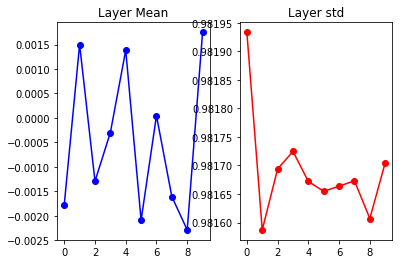

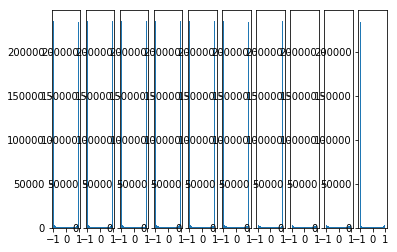

In [337]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(),layer_means,'ob-')
plt.title('Layer Mean')
plt.subplot(122)
plt.plot(Hs.keys(),layer_stds,'or-')
plt.title('Layer std')

plt.figure()
for key in Hs.keys():
    plt.subplot(1,len(Hs),key+1)
    plt.hist(Hs[key].ravel(),30,range=[-1,1])